In [41]:
from mint.config import DATA_DIR
from wordcloud import WordCloud
from collections import Counter
import re
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Kiến trúc dữ liệu

In [3]:
def load_jsonl(path):
    with open(path, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

data_dir = DATA_DIR("GSM8K")

train_data = load_jsonl(os.path.join(data_dir, 'train.jsonl'))
test_data = load_jsonl(os.path.join(data_dir, 'test.jsonl'))

datas = {
    "Train": train_data,
    "Test": test_data,
}

for name, data in datas.items():
    print(f"\n--- {name} ---")
    print(f"Data type of the dataset: {type(data)}")
    
    if isinstance(data, list) and len(data) > 0:
        first_element = data[0]
        print(f"Data type of the first element: {type(first_element)}")
        
        if isinstance(first_element, dict):
            print(f"Dict type: {list(first_element.keys())}")
            
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)


--- Train ---
Data type of the dataset: <class 'list'>
Data type of the first element: <class 'dict'>
Dict type: ['question', 'answer']

--- Test ---
Data type of the dataset: <class 'list'>
Data type of the first element: <class 'dict'>
Dict type: ['question', 'answer']


In [4]:
datasets = {
    "Train": df_train,
    "Test": df_test
}

for name, df in datasets.items():
    print(f"--- {name} Dataset ---")
    display(df.head()) 
    print("\n")

--- Train Dataset ---


,question,answer
0,Natalia sold clips to 48 of her friends in Apr...,Natalia sold 48/2 = <<48/2=24>>24 clips in May...
1,Weng earns $12 an hour for babysitting. Yester...,Weng earns 12/60 = $<<12/60=0.2>>0.2 per minut...
2,Betty is saving money for a new wallet which c...,"In the beginning, Betty has only 100 / 2 = $<<..."
3,"Julie is reading a 120-page book. Yesterday, s...",Maila read 12 x 2 = <<12*2=24>>24 pages today....
4,James writes a 3-page letter to 2 different fr...,He writes each friend 3*2=<<3*2=6>>6 pages a w...




--- Test Dataset ---


,question,answer
0,Janet’s ducks lay 16 eggs per day. She eats th...,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...
1,A robe takes 2 bolts of blue fiber and half th...,It takes 2/2=<<2/2=1>>1 bolt of white fiber\nS...
2,Josh decides to try flipping a house. He buys...,The cost of the house and repairs came out to ...
3,James decides to run 3 sprints 3 times a week....,He sprints 3*3=<<3*3=9>>9 times\nSo he runs 9*...
4,"Every day, Wendi feeds each of her chickens th...","If each chicken eats 3 cups of feed per day, t..."


# Thống kê

In [5]:
for name, df in datasets.items():
    print(f"--- {name} Dataset ---")
    display(df.info()) 
    print("\n")

--- Train Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7473 entries, 0 to 7472
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  7473 non-null   object
 1   answer    7473 non-null   object
dtypes: object(2)
memory usage: 116.9+ KB


None



--- Test Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  1319 non-null   object
 1   answer    1319 non-null   object
dtypes: object(2)
memory usage: 20.7+ KB


None

In [6]:
def count_words(df):
    df['question_length'] = df['question'].apply(lambda x: len(x.split()))
    df['answer_length'] = df['answer'].apply(lambda x: len(x.split()))
    print(df[['question_length', 'answer_length']].describe())
    print('\n')

In [7]:
len_total = 0
for name, df in datasets.items():
    print(f"Length of {name} Dataset: {len(df)}")
    len_total += len(df)
    count_words(df)

print(f"Length of total: {len_total}\n")

Length of Train Dataset: 7473
       question_length  answer_length
count      7473.000000    7473.000000
mean         45.092600      51.711762
std          17.482279      26.731678
min           9.000000       4.000000
25%          33.000000      32.000000
50%          42.000000      47.000000
75%          54.000000      66.000000
max         183.000000     216.000000


Length of Test Dataset: 1319
       question_length  answer_length
count      1319.000000    1319.000000
mean         46.250948      52.783927
std          18.073655      26.744554
min          15.000000       5.000000
25%          33.000000      33.000000
50%          43.000000      49.000000
75%          55.000000      68.000000
max         164.000000     173.000000


Length of total: 8792



# Visualize

--- Train Dataset ---
Total:  336977
Max:  183
Min:  9


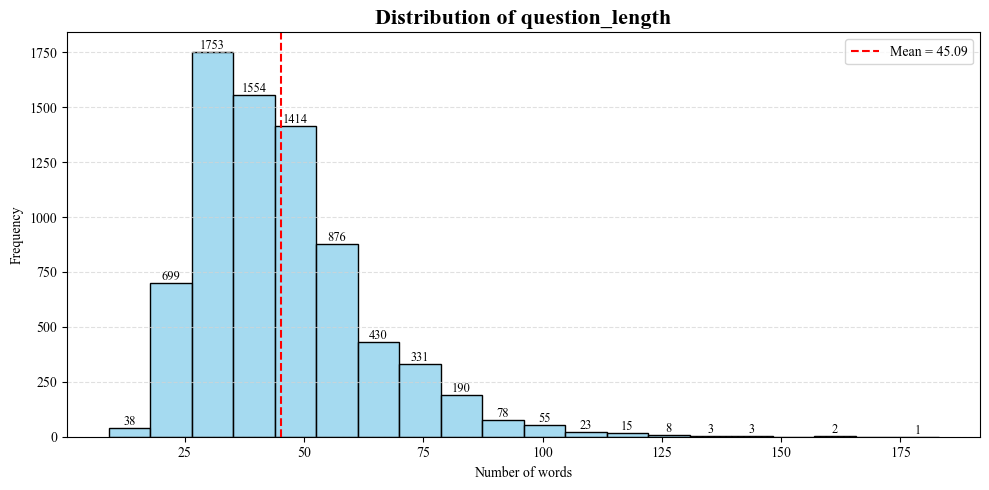

Total:  386442
Max:  216
Min:  4


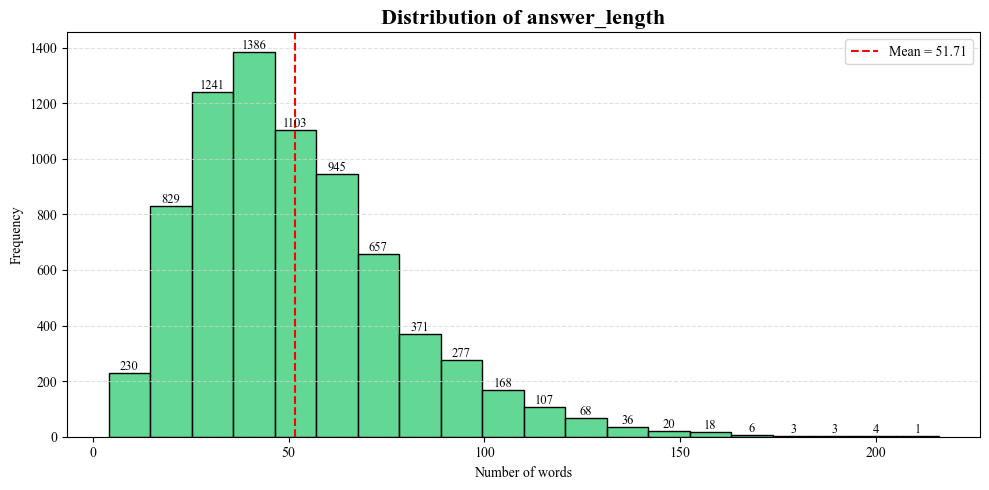

--- Test Dataset ---
Total:  61005
Max:  164
Min:  15


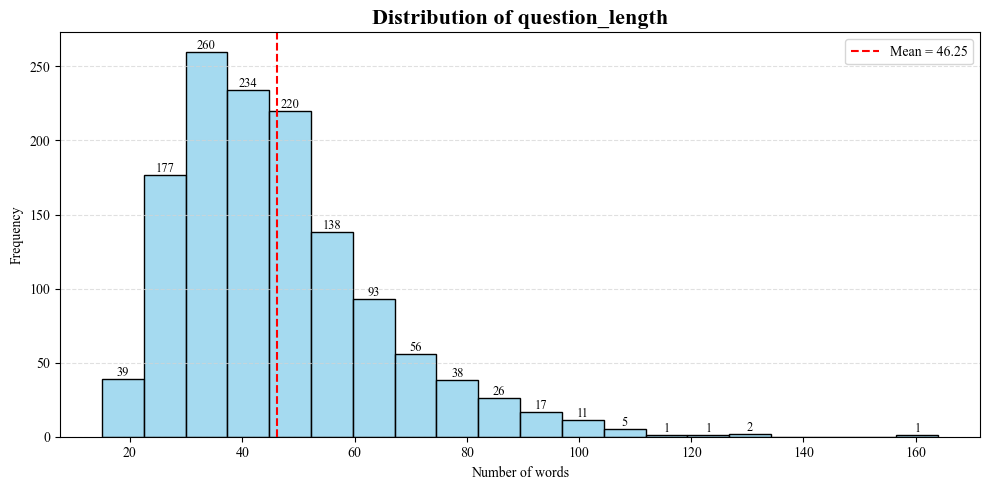

Total:  69622
Max:  173
Min:  5


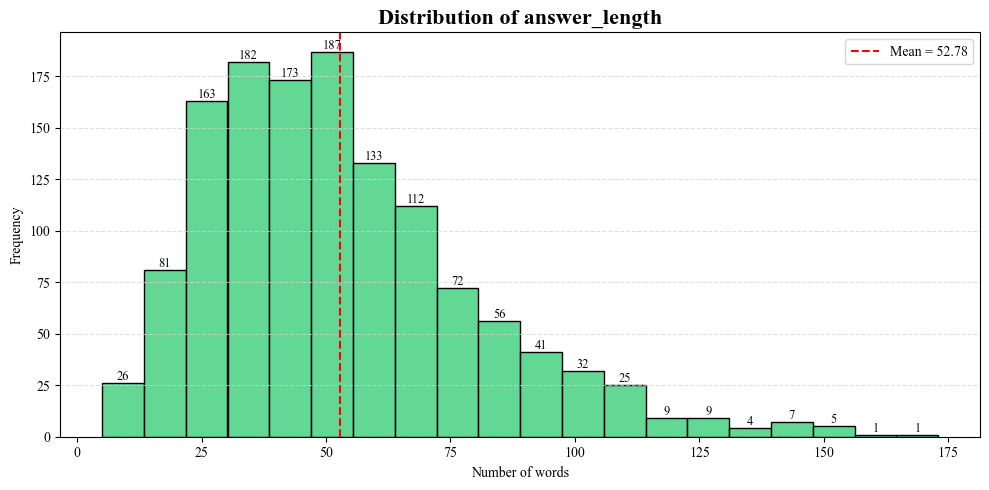

In [8]:
plt.rcParams['font.family'] = 'Times New Roman'
def plot_length_distribution(df: pd.DataFrame, column, color):
    min_val = df[column].min()
    max_val = df[column].max()
    total = df[column].sum()

    print('Total: ', total)
    print('Max: ', max_val)
    print('Min: ',min_val)
    
    plt.figure(figsize=(10, 5))
    ax = sns.histplot(df[column], bins=20, color=color)
    plt.title(f'Distribution of {column}', fontweight='bold', fontsize=16)
    plt.xlabel('Number of words')
    plt.ylabel('Frequency')
    
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom', fontsize=9, color='black')
    
    mean_value = df[column].mean()
    ax.axvline(x=mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Mean = {mean_value:.2f}')
    
    plt.grid(axis='x', visible=False)
    plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()

colors = sns.color_palette('pastel')
for name, df in datasets.items():
    print(f"--- {name} Dataset ---")
    plot_length_distribution(df, 'question_length', 'skyblue')
    plot_length_distribution(df, 'answer_length', '#2ecc71')

/var/folders/zl/w0vj8dg91gg3w47_8p3fp2r00000gn/T/ipykernel_52048/926191278.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(op_counts.keys()), y=list(op_counts.values()), palette='pastel', edgecolor='black')


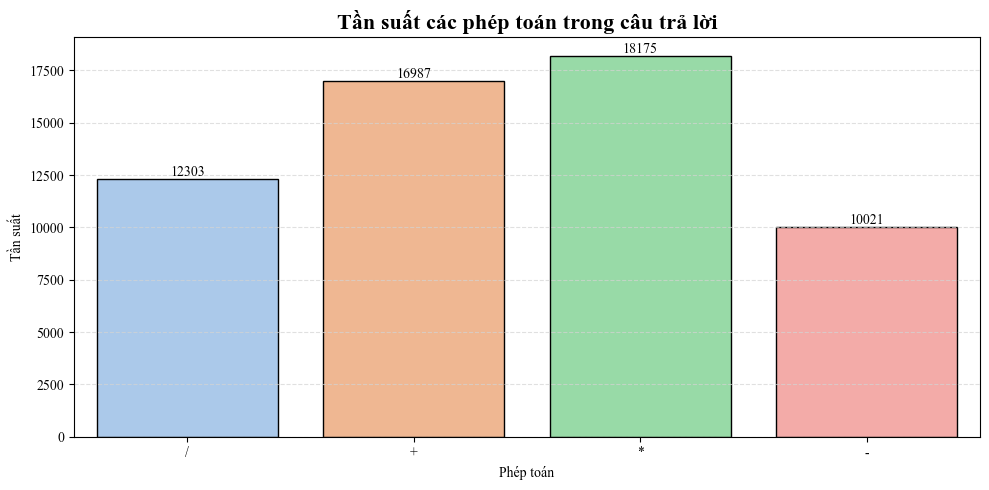

In [9]:
def extract_operations(answer):
    return re.findall(r'[\+\-\*/]', answer)

df_train['operations'] = df_train['answer'].apply(extract_operations)
all_ops = [op for sublist in df_train['operations'] for op in sublist]
op_counts = Counter(all_ops)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(op_counts.keys()), y=list(op_counts.values()), palette='pastel', edgecolor='black')
plt.title('Tần suất các phép toán trong câu trả lời', fontweight='bold',fontsize=16)
plt.xlabel('Phép toán')
plt.ylabel('Tần suất')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2,
                height,
                int(height),
                ha='center',
                va='bottom',
                fontsize=10)
plt.grid(axis='x', visible = False)
plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)
plt.tight_layout()
plt.show()

- **Phép nhân và phép cộng là hai phép toán phổ biến nhất**, chiếm ưu thế rõ rệt so với phép chia và phép trừ.
- Sự khác biệt giữa các phép toán không quá lớn, nhưng **phép trừ có xu hướng xuất hiện ít hơn các phép khác**.

In [10]:
def categorize_problem(ops):
    if not ops:
        return "unknown"
    unique_ops = set(ops)
    if unique_ops == {'+'}:
        return 'addition'
    elif unique_ops == {'-'}:
        return 'subtraction'
    elif unique_ops == {'*'}:
        return 'multiplication'
    elif unique_ops == {'/'}:
        return 'division'
    elif len(unique_ops) > 1:
        return 'mixed'
    return 'other'

/var/folders/zl/w0vj8dg91gg3w47_8p3fp2r00000gn/T/ipykernel_52048/3355286272.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_train, x='category', order=df_train['category'].value_counts().index, palette = sns.color_palette("pastel", n_colors=len(sizes)), edgecolor='black')


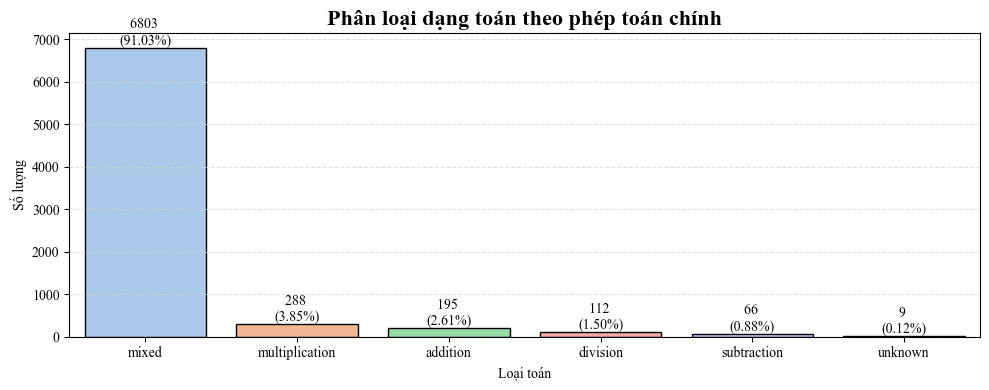

In [12]:
total = len(df_train)
df_train['category'] = df_train['operations'].apply(categorize_problem)

category_counts = df_train['category'].value_counts()
labels = category_counts.index
sizes = category_counts.values

plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df_train, x='category', order=df_train['category'].value_counts().index, palette = sns.color_palette("pastel", n_colors=len(sizes)), edgecolor='black')
plt.title('Phân loại dạng toán theo phép toán chính', fontweight='bold',fontsize=16)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percent = (height / total) * 100
        ax.text(p.get_x() + p.get_width() / 2,
                height,
                f'{int(height)} \n({percent:.2f}%)',  
                ha='center',
                va='bottom',
                fontsize=10)
plt.grid(axis='x', visible = False)
plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)
plt.xlabel('Loại toán')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()

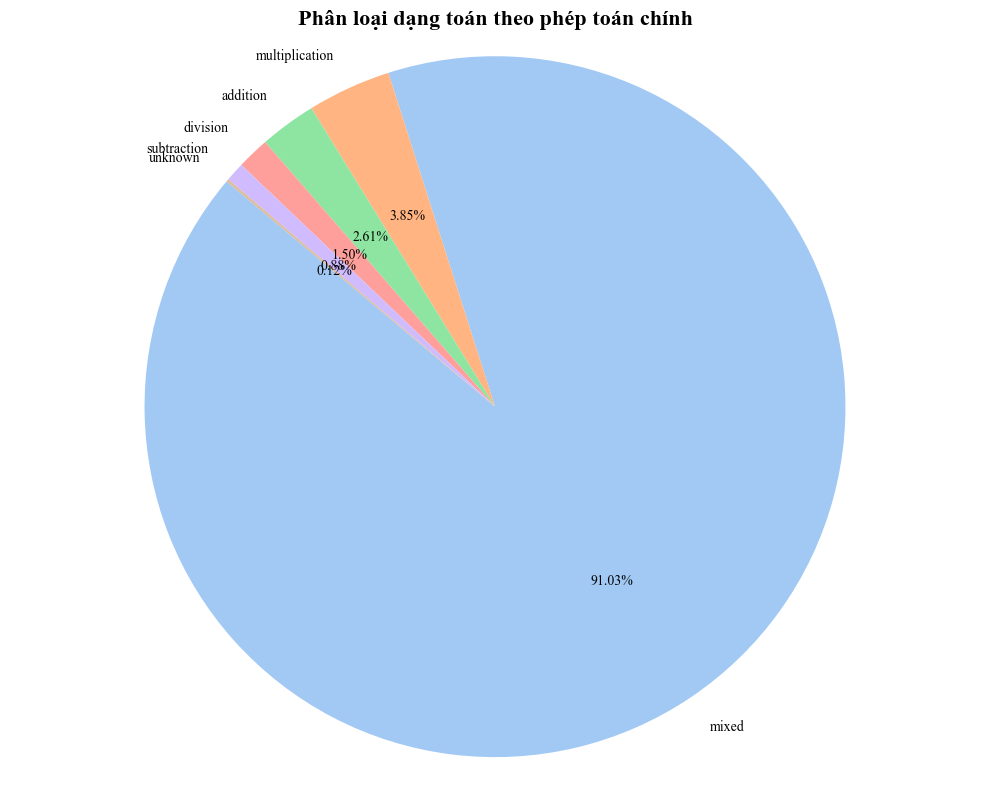

In [13]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Phân loại dạng toán theo phép toán chính', fontweight='bold', fontsize=16)
plt.axis('equal')  
plt.tight_layout()
plt.show()

Loại toán **"mixed" (hỗn hợp)** chiếm số lượng **lớn nhất**, với khoảng **6.500 đến 7.000 bài toán**. Điều này cho thấy tập dữ liệu có nhiều bài toán kết hợp nhiều phép tính (cộng, trừ, nhân, chia) hoặc các bài toán phức tạp hơn.
Các loại phép toán khác (**multiplication - nhân, addition - cộng, division - chia, subtraction - trừ, unknown - không xác định**) có số lượng **rất thấp**, dao động từ **0 đến khoảng 500 bài toán mỗi loại**.
Loại **"unknown"** gần như **không có dữ liệu đáng kể**, cho thấy tập dữ liệu đã được phân loại tốt và ít bài toán không rõ loại.

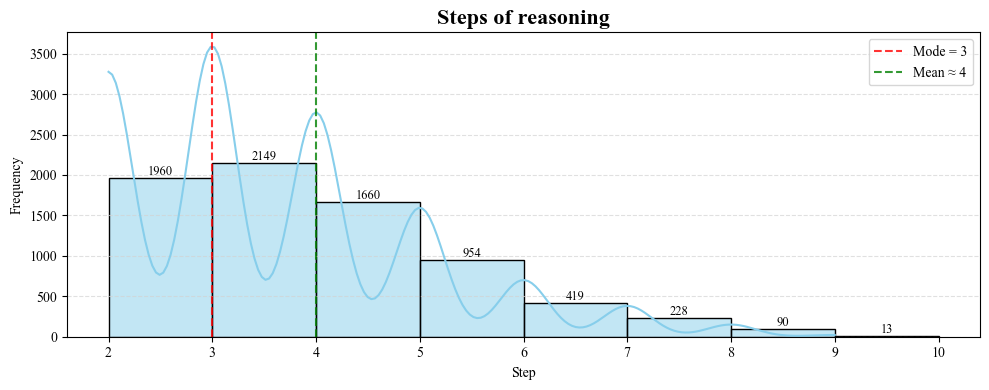

In [37]:
df_train['num_steps'] = df_train['answer'].str.count('\n')

peak_value = df_train['num_steps'].mode()[0]
mean_value = round(df_train['num_steps'].mean())

plt.figure(figsize=(10, 4))
ax = sns.histplot(df_train['num_steps'], bins=range(round(df_train['num_steps'].min()), round(df_train['num_steps'].max() + 2)), color='skyblue', kde= True)

plt.title('Steps of reasoning', fontweight='bold', fontsize=16)
plt.xlabel('Step')
plt.ylabel('Frequency')

plt.grid(axis='x', visible=False)
plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percent = (height / total) * 100
        ax.text(p.get_x() + p.get_width() / 2,
                height + 0.5,  
                f'{int(height)}',
                ha='center',
                va='bottom',
                fontsize=9)

plt.axvline(peak_value, color='red', linestyle='--', linewidth=1.5,
            label=f'Mode = {peak_value}', alpha=0.8)

plt.axvline(mean_value, color='green', linestyle='--', linewidth=1.5,
            label=f'Mean ≈ {mean_value}', alpha=0.8)

plt.legend()
plt.tight_layout()
plt.show()

In [35]:
# In ngẫu nhiên 3 ví dụ có hơn 2 bước
df_train[df_train['num_steps'] == 9][['question', 'answer']].sample(13).head(13)

,question,answer
1708,"Mark's basketball team scores 25 2 pointers, 8...","Mark's team scores 25 2 pointers, meaning they..."
3715,"Sam bought a dozen boxes, each with 30 highlig...",Sam bought 12 boxes x $10 = $<<12*10=120>>120 ...
3030,Together 3 friends watched 411 short videos. K...,Let U = the number of videos Uma watched\nEkon...
4126,Megan pays $16 for a shirt that costs $22 befo...,"Let x be the amount of the discount.\nWe have,..."
7364,Angelo and Melanie want to plan how many hours...,Angelo and Melanie think they should dedicate ...
5853,"In a fruit salad, there are raspberries, green...",Green grapes = G\nRed grapes = 3G + 7\nRaspber...
7446,"In a certain school, 2/3 of the male students ...",The students are divided into 3 + 2 = <<3+2=5>...
2920,The total average age of three friends is 40. ...,The total age for the three friends is 40*3 = ...
261,You can buy 4 apples or 1 watermelon for the s...,If 36 fruits were evenly split between 3 types...
7276,"The bowl of fruit contains apples, pears, and ...",Let A be the number of apples.\nThere are A+2 ...


### Biểu đồ "Số bước tính toán (steps of reasoning)" cho thấy:

- Phần lớn bài toán có số bước từ 2 đến 5, với đỉnh cao nhất khoảng 2.149 lần tại 3 bước.
- Phân phối lệch phải, cho thấy đa số bài toán đơn giản, ít bước logic, phù hợp với cấp tiểu học.

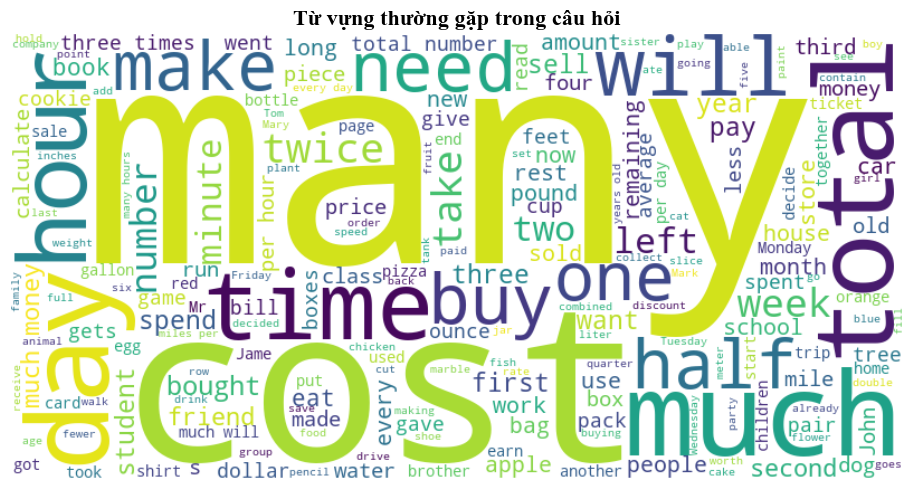

In [39]:
all_text = " ".join(df_train['question'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Từ vựng thường gặp trong câu hỏi', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

### Word cloud "Từ vựng thường gặp trong câu hỏi" cho thấy:

- Các từ **phổ biến nhất**: **"many", "buy", "want", "twice", "total", "day"** (cỡ chữ lớn).
- **Chủ đề chính**: **Mua bán** *(buy, sell, cost, money)*, **thời gian** *(day, week, year)*, **số lượng** *(many, much, twice, half)*, và danh từ quen thuộc *(car, house, apple, pizza)*.
- **Insight**: *Câu hỏi tập trung vào các bài toán thực tế liên quan đến giao dịch, đếm số lượng, và đo lường thời gian, phù hợp với toán tiểu học.*

Top đơn vị đo thường gặp: [('hours', 692), ('minutes', 655), ('of', 644), ('more', 596), ('times', 553), ('each', 543), ('miles', 455), ('years', 443), ('per', 410), ('and', 396)]


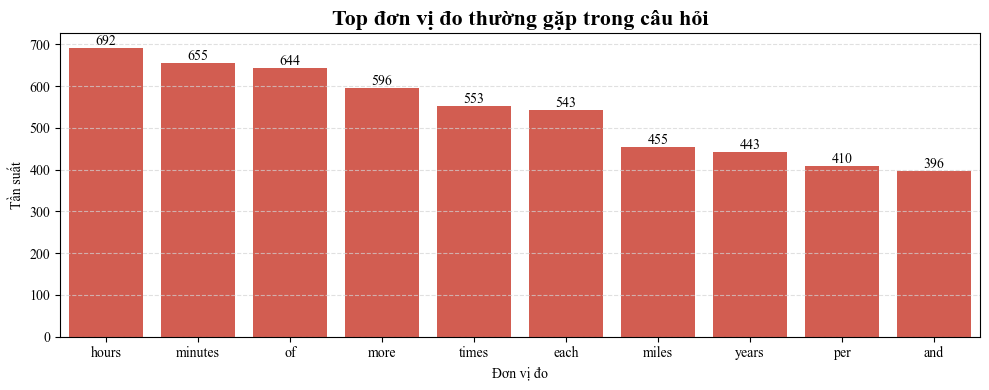

In [40]:
# Trích xuất các đơn vị đo (sau chữ số)
def extract_units(q):
    return re.findall(r'\b\d+\s+([a-zA-Z]+)', q)

unit_list = df_train['question'].apply(extract_units)
all_units = [unit.lower() for sub in unit_list for unit in sub]

unit_counts = Counter(all_units).most_common(10)
print("Top đơn vị đo thường gặp:", unit_counts)

# Biểu đồ
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=[u[0] for u in unit_counts], y=[u[1] for u in unit_counts], color ='#e74c3c')
plt.title('Top đơn vị đo thường gặp trong câu hỏi', fontweight='bold',fontsize=16)
plt.xlabel('Đơn vị đo')
plt.ylabel('Tần suất')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percent = (height / total) * 100
        ax.text(p.get_x() + p.get_width() / 2,
                height,
                f'{int(height)}',
                ha='center',
                va='bottom',
                fontsize=10)
plt.grid(axis='x', visible=False)
plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)
plt.tight_layout()
plt.show()

### Biểu đồ "Top từ vựng thường gặp trong câu hỏi" cho thấy:

- Các từ **"hours", "minutes", và "of"** có tần suất **cao nhất (khoảng 700 lần)**, phản ánh sự tập trung vào thời gian và sở hữu.
- **"Times", "each", "more"** cũng phổ biến **(500-600 lần)**.
- Từ **"years", "miles", "per", và "and"** giảm dần **(300-400 lần)**.
- **Insight**: *Câu hỏi tập trung vào các bài toán liên quan đến thời gian, đo lường, và so sánh, phù hợp với ngữ cảnh thực tế trong toán tiểu học.*